In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls

In [30]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
city_names = []
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

# get weather info for all citues
for city in cities:
    params = {
        'appid': api_key,
        'q': city,
        'units': 'imperial'
    }
    response = requests.get(url, params=params).json()
    try :
        print ("Processing weather info for: " +response['name'])
        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        print (response['message'])
   

Processing weather info for: Atar
city not found
Processing weather info for: Moron
Processing weather info for: Altay
Processing weather info for: Airai
Processing weather info for: Tuatapere
Processing weather info for: Esperance
Processing weather info for: Majene
Processing weather info for: Vaini
Processing weather info for: Busselton
Processing weather info for: Mount Isa
city not found
Processing weather info for: Magadan
Processing weather info for: Ilinskiy
Processing weather info for: Margate
city not found
Processing weather info for: Port Alfred
Processing weather info for: La Rioja
Processing weather info for: Half Moon Bay
Processing weather info for: Chokurdakh
Processing weather info for: Umm Lajj
Processing weather info for: Saskylakh
Processing weather info for: Samana
Processing weather info for: Srednekolymsk
Processing weather info for: Port Blair
city not found
Processing weather info for: Qaanaaq
Processing weather info for: Naze
Processing weather info for: Khat

Processing weather info for: Faanui
Processing weather info for: La Ronge
Processing weather info for: Biloela
Processing weather info for: East London
Processing weather info for: San Marcos
Processing weather info for: Beringovskiy
Processing weather info for: Constitucion
Processing weather info for: Acapulco
Processing weather info for: Antigonish
city not found
Processing weather info for: San Juan
Processing weather info for: Tual
Processing weather info for: Collie
Processing weather info for: Broome
Processing weather info for: Nelson Bay
Processing weather info for: Les Cayes
Processing weather info for: Rio Grande
city not found
Processing weather info for: Port Lincoln
Processing weather info for: Bundaberg
Processing weather info for: Hamilton
Processing weather info for: Cabo San Lucas
Processing weather info for: Severo-Kurilsk
Processing weather info for: Santa Isabel
city not found
Processing weather info for: Sulangan
Processing weather info for: Byron Bay
Processing w

Processing weather info for: Gimli
Processing weather info for: Huambo
Processing weather info for: Puerto Madryn
Processing weather info for: Alofi
Processing weather info for: Kalanguy
Processing weather info for: Zhuanghe
Processing weather info for: Bandarbeyla
Processing weather info for: Garissa
Processing weather info for: Liling
Processing weather info for: San Javier
Processing weather info for: Miri
Processing weather info for: Aykhal
Processing weather info for: Vagay
Processing weather info for: Cabadiangan
city not found
city not found
Processing weather info for: Marsh Harbour
Processing weather info for: Douglas
Processing weather info for: College
Processing weather info for: Saint Anthony
Processing weather info for: San Roque
Processing weather info for: Poum
Processing weather info for: Coihaique
Processing weather info for: Riyadh
Processing weather info for: Kita
Processing weather info for: Vila Franca do Campo
Processing weather info for: Narsaq
Processing weathe

In [31]:
# create a data frame with the info
weather_dict = {
    "city" : city_names,
    "lat" : lat,
    "temp" : temp,
    "humidity": humidity,
    "cloudiness":cloudiness,
    "wind Speed":wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,cloudiness,humidity,lat,temp,wind Speed
0,Atar,0,20,20.52,84.44,6.53
1,Moron,75,69,10.49,82.40,2.73
2,Altay,0,74,47.83,39.44,3.18
3,Airai,0,74,-8.93,72.38,1.50
4,Tuatapere,0,84,-46.13,53.30,19.73


In [32]:
# save dataframe to csv file
weather_data.to_csv(output_data_file,index=False,header=True);

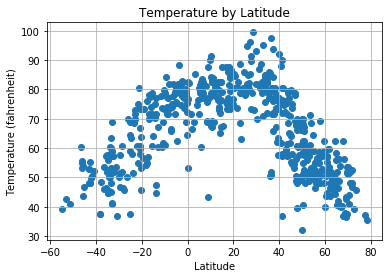

In [33]:
# create temp vs latitude scatter plot
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")
# Incorporate the other graph properties
plt.title("Temperature by Latitude")
plt.ylabel("Temperature (fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('images/temp_lat')

# Show plot
plt.show()

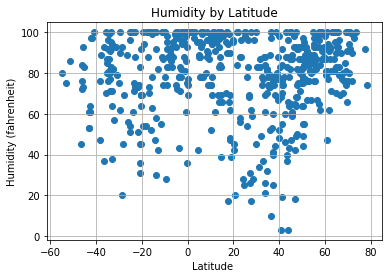

In [34]:
# create humidity vx latitude scatter plot
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")
# Incorporate the other graph properties
plt.title("Humidity by Latitude")
plt.ylabel("Humidity (fahrenheit)")
plt.xlabel("Latitude ")
plt.grid(True)

# Save the figure
plt.savefig('images/humidity_lat')
# Show plot
plt.show()


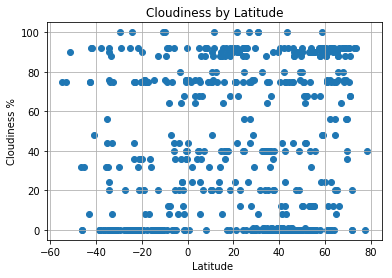

In [26]:
# create cloudiness vx latitude scatter plot
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")
# Incorporate the other graph properties
plt.title("Cloudiness by Latitude")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude ")
plt.grid(True)

# Save the figure
plt.savefig('images/cloudiness_lat')
# Show plot
plt.show()


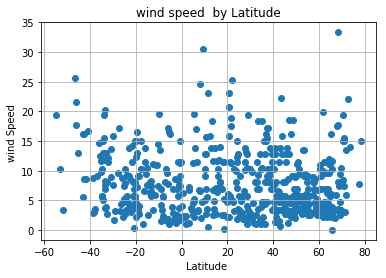

In [27]:
# create wind speed vx latitude scatter plot
plt.scatter(weather_data["lat"], weather_data["wind Speed"], marker="o")
# Incorporate the other graph properties
plt.title("wind speed  by Latitude")
plt.ylabel("wind Speed ")
plt.xlabel("Latitude ")
plt.grid(True)

# Save the figure
plt.savefig('images/wind_speed_lat')
# Show plot
plt.show()


Based on the graphics above we can determine that the temperature in the cities that are farther away from the ecuator (0) is lower than those who are near.  The humidity levels also seem to be in relation with the closeness to the ecuator, however it is a more spread graphic, and there seems to be latitudes with a lot a variable humidity.
CLoudiness seems very spread with no important concentration on any latitude.
As for windspeed the fastest wind speeds at this moment seem to be happening in the northern hemisfere.